In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,MaxPool2D,Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

In [6]:
xtrain[0].shape

(28, 28)

In [13]:
model=Sequential()
model.add(Conv2D(filters=50,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='valid',strides=1,))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',padding='valid',strides=(1,1)))
model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',padding='valid',strides=(1,1)))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 100)       45100     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 100)         90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 100)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [15]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [16]:
hist=model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest),batch_size=500)

Epoch 1/20
120/120 [==============================] - 32s 252ms/step - loss: 1.1761 - accuracy: 0.7146 - val_loss: 0.4748 - val_accuracy: 0.8271
Epoch 2/20
120/120 [==============================] - 30s 251ms/step - loss: 0.3935 - accuracy: 0.8582 - val_loss: 0.3683 - val_accuracy: 0.8694
Epoch 3/20
120/120 [==============================] - 29s 239ms/step - loss: 0.3285 - accuracy: 0.8819 - val_loss: 0.3492 - val_accuracy: 0.8747
Epoch 4/20
120/120 [==============================] - 28s 232ms/step - loss: 0.2938 - accuracy: 0.8938 - val_loss: 0.3373 - val_accuracy: 0.8787
Epoch 5/20
120/120 [==============================] - 28s 235ms/step - loss: 0.2649 - accuracy: 0.9044 - val_loss: 0.3258 - val_accuracy: 0.8843
Epoch 6/20
120/120 [==============================] - 28s 236ms/step - loss: 0.2425 - accuracy: 0.9114 - val_loss: 0.3059 - val_accuracy: 0.8904
Epoch 7/20
120/120 [==============================] - 28s 234ms/step - loss: 0.2234 - accuracy: 0.9187 - val_loss: 0.3180 - val_ac

In [17]:
his=hist.history

In [18]:
his

{'loss': [1.1760624647140503,
  0.3934772312641144,
  0.32850396633148193,
  0.2937715947628021,
  0.264902263879776,
  0.24250668287277222,
  0.22336825728416443,
  0.20759764313697815,
  0.19284090399742126,
  0.18208223581314087,
  0.17271152138710022,
  0.16100074350833893,
  0.14490875601768494,
  0.13902878761291504,
  0.12672293186187744,
  0.1177389845252037,
  0.10880130529403687,
  0.10470102727413177,
  0.09438923001289368,
  0.09684498608112335],
 'accuracy': [0.7146000266075134,
  0.8581500053405762,
  0.881933331489563,
  0.893750011920929,
  0.904366672039032,
  0.9114166498184204,
  0.918666660785675,
  0.9247833490371704,
  0.9286999702453613,
  0.9330999851226807,
  0.9365666508674622,
  0.9400833249092102,
  0.9463666677474976,
  0.9483333230018616,
  0.9536333084106445,
  0.9562666416168213,
  0.9593499898910522,
  0.9613666534423828,
  0.9649666547775269,
  0.9630333185195923],
 'val_loss': [0.47484663128852844,
  0.3683285415172577,
  0.34918519854545593,
  0.3373

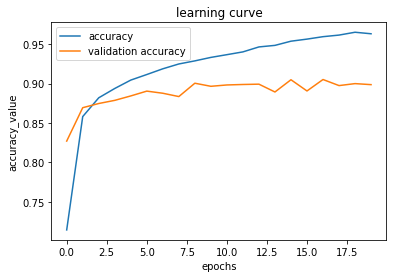

In [19]:
plt.plot(his['accuracy'],label='accuracy')
plt.plot(his['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.title('learning curve')
plt.ylabel('accuracy_value')
plt.legend()

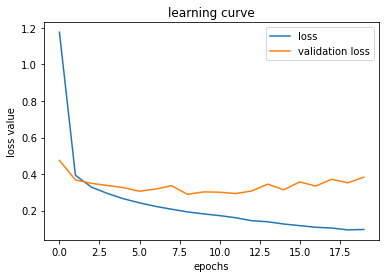

In [20]:
plt.plot(his['loss'],label='loss')
plt.plot(his['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.title('learning curve')
plt.legend()

In [22]:
pred=model.predict(xtest)

313/313 [==============================] - 4s 12ms/step


In [23]:
np.argmax(pred[5])

1

In [24]:
ytest[5]

1

In [28]:
l=[]
for i in range(10,20):
    l.append(np.argmax(pred[i]))

In [29]:
l

[4, 5, 5, 3, 4, 1, 2, 4, 8, 0]

In [30]:
ytest[10:20]

array([4, 5, 7, 3, 4, 1, 2, 4, 8, 0], dtype=uint8)

In [31]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 4s 11ms/step - loss: 0.3830 - accuracy: 0.8986


[0.3830198645591736, 0.8985999822616577]

In [32]:
cls=['Top','Trouser','Pullover','Dress','Coat','Sandals','Shirt','Sneaker','Bag','Ankle boots']

In [33]:
a=np.argmax(pred[5])
cls[a]

'Trouser'

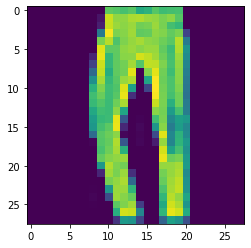

In [35]:
plt.imshow(xtest[5])